In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Implemente una función en Python que realice la transformación mostrada en la siguiente figura.

![alt text](image.png)

In [16]:


def apply_transformation(image, low_in, high_in, low_out, high_out):

  slope = (high_out - low_out) / (high_in - low_in)
  intercept = low_out - low_in * slope

  apply_rect = lambda x: slope * x + intercept

  # apply transformation to each pixel

  image_copy = image.copy()
  image_copy = image_copy.astype(float)

  s1 = image_copy <= low_in
  s2 = image_copy >= high_in


  image_copy[s1] = high_out
  image_copy[s2] = low_out

  image_copy[~s1 & ~s2] = apply_rect(image_copy[~s1 & ~s2])

  return image_copy



def show_image(image, title):
  plt.imshow(image, cmap='gray')
  plt.title(title)
  plt.show()

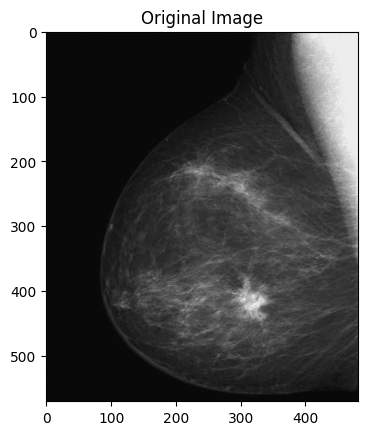

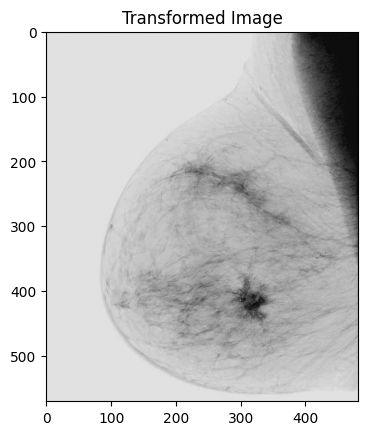

In [18]:
# Apply transformation to the image



imgxd = cv2.imread('./pixel_transformation/breast_digital_X-ray.tif',cv2.IMREAD_GRAYSCALE)


# Show the original image

show_image(imgxd, 'Original Image')


# Apply transformation to the image

imgxd_transformed = apply_transformation(imgxd, 0, 255, 255, 0)

show_image(imgxd_transformed, 'Transformed Image')